# Business objective

Develop a model to predicts if an applicant will be approved for a credit card or not.

### 0.  Import the necessary packages

In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pathlib import Path
import warnings
warnings.simplefilter('ignore')

### 1. Get the Data

In [2]:
#Read dataset
df = pd.read_csv("Credit_card.csv")
#Making copy of origional data
data = df.copy()
df_target = pd.read_csv("Credit_card_label.csv") #Label: 0 is application approved and 1 is application rejected.



In [18]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [19]:
df_target.columns

Index(['Ind_ID', 'label'], dtype='object')

In [21]:
# make the features name in lower case latter
data.columns = data.columns.str.lower()
df_target.columns = df_target.columns.str.lower()

In [22]:
data.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members'],
      dtype='object')

In [23]:
df_target.columns

Index(['ind_id', 'label'], dtype='object')

In [27]:
#Combining the target variable and independent variable into a sible dataframe
combine_data = data.merge(df_target, how='inner', on='ind_id')

### 2. Explore the data

**2.0 Pandas Profiling (Automatic EDA)**

In [7]:
profile_report = ProfileReport(data, explorative=True,dark_mode=True)


In [8]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**2.1 Quick Summry of data** 

In [28]:
data.head()

ind_id gender car_owner propert_owner  children  annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            type_income         education marital_status       housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   birthday_count  employed_days  mobile_phone  work_phone  phone  email_id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  type_occupation  family_members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [29]:
data.tail()

ind_id gender car_owner propert_owner  children  annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               type_income                      education  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            marital_status       housing_type  birthday_count  employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      mobile_phone  work_phone  phone  email_id type_occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      family_members  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ind_id           1548 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1548 non-null   object 
 3   propert_owner    1548 non-null   object 
 4   children         1548 non-null   int64  
 5   annual_income    1525 non-null   float64
 6   type_income      1548 non-null   object 
 7   education        1548 non-null   object 
 8   marital_status   1548 non-null   object 
 9   housing_type     1548 non-null   object 
 10  birthday_count   1526 non-null   float64
 11  employed_days    1548 non-null   int64  
 12  mobile_phone     1548 non-null   int64  
 13  work_phone       1548 non-null   int64  
 14  phone            1548 non-null   int64  
 15  email_id         1548 non-null   int64  
 16  type_occupation  1060 non-null   object 
 17  family_members

In [31]:
data.describe()

ind_id     children  annual_income  birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       employed_days  mobile_phone   work_phone        phone     email_id  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       family_members  
count     1548.000000  
mean         2.161499  
std          0.947772  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          3.000000  
max         15.000000

In [32]:
data.shape

(1548, 18)

**Observation:**
- We can see that features like Birthday_count and Employed_days are in days format, so we have to convert them into years and named as age and work_exp respictivelly.

In [ ]:
#Converting Birthday_count into age (in years)
data['age'] = round(abs( data['Birthday_count']/365.25))

#Converting Employed_days into work_exp (in years)
data['work_exp'] = round(abs(data['Employed_days']/365),1)

#Drop those previous Birthday_count & Employed_days columns
data.drop(['Birthday_count','Employed_days'], axis=1, inplace=True)

### 2.3 Univariate Analysis

In [33]:
data.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members'],
      dtype='object')

**2.3.1 Gender**

In [37]:
data['gender'].value_counts()

F    973
M    568
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

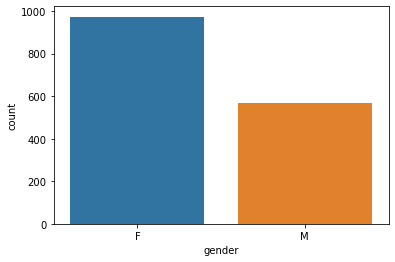

In [38]:
#Create the countplot
sns.countplot(x='gender', data=data, order=data['gender'].value_counts().index)

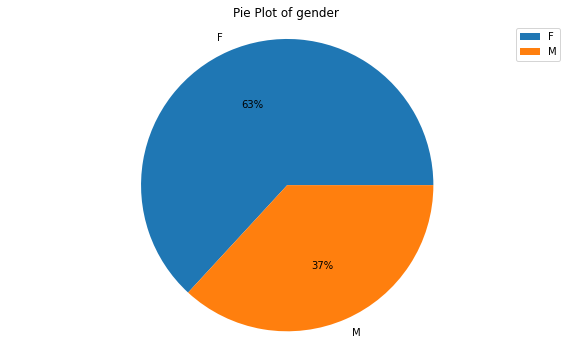

In [55]:
grouped_data = pd.DataFrame(data['gender'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.gender, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of gender')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- 63% applicants are female while 37% are male

**2.3.2 car_owner**

In [57]:
data['car_owner'].value_counts()

N    924
Y    624
Name: car_owner, dtype: int64

<AxesSubplot:xlabel='car_owner', ylabel='count'>

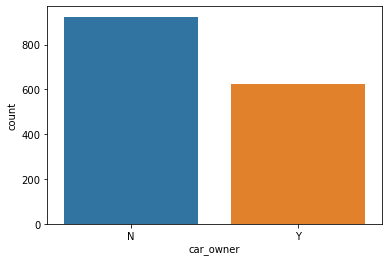

In [58]:
sns.countplot(x='car_owner', data=data, order=data['car_owner'].value_counts().index)

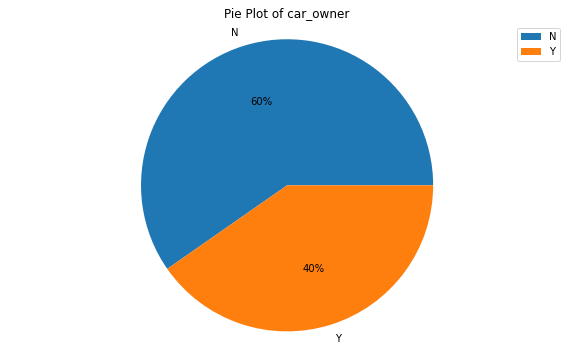

In [60]:
#Pie plot
grouped_data = pd.DataFrame(data['car_owner'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.car_owner, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of car_owner')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- **Most of the applicant don't have car**

**2.3.3 propert_owner**

In [61]:
data['propert_owner'].value_counts()

Y    1010
N     538
Name: propert_owner, dtype: int64

<AxesSubplot:xlabel='propert_owner', ylabel='count'>

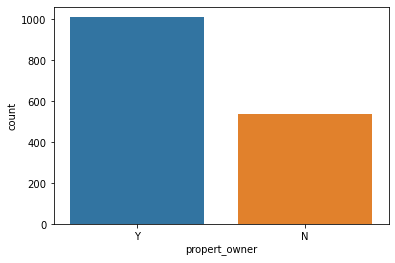

In [62]:
sns.countplot(x='propert_owner', data=data, order=data['propert_owner'].value_counts().index)

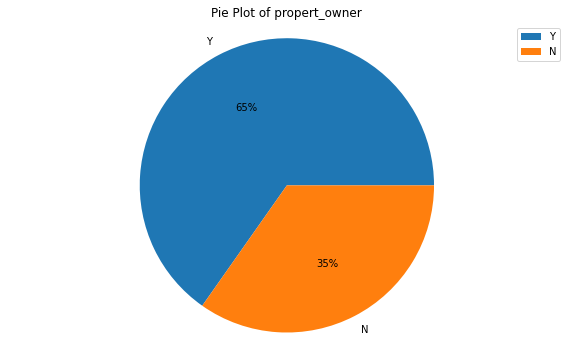

In [64]:
#Pie plot
grouped_data = pd.DataFrame(data['propert_owner'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.propert_owner, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of propert_owner')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most of the applicant don't have Property

**2.3.4 children**

In [65]:
data['children'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

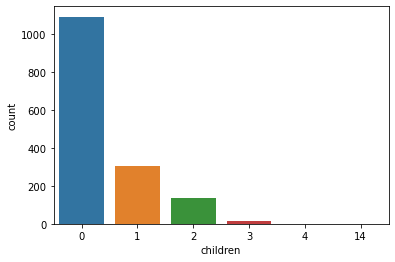

In [67]:
#Count plot
sns.countplot(x='children', data=data, order=data['children'].value_counts().index)

<AxesSubplot:xlabel='children'>

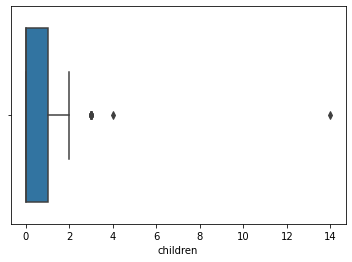

In [70]:
sns.boxplot(x='children', data=data, )

**Observation:**
- Most applicant don't have child
- There is 3 outliers 3, 4, 14

**2.3.5 annual_income**

In [71]:
data['annual_income'].value_counts()

135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
72900.0       1
301500.0      1
95850.0       1
115200.0      1
114750.0      1
Name: annual_income, Length: 115, dtype: int64

<AxesSubplot:ylabel='annual_income'>

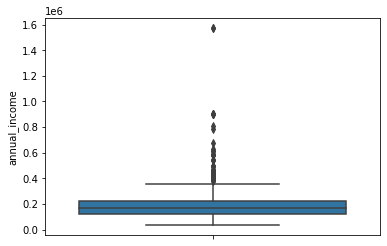

In [80]:
sns.boxplot(y='annual_income', data=data,)

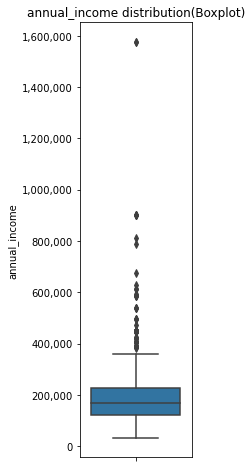

In [83]:
#Box_plot
feature ='annual_income'
fig, ax = plt.subplots(figsize=(2,8))
sns.boxplot(y=data[feature])
plt.title('{} distribution(Boxplot)'.format(feature))
# suppress scientific notation
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

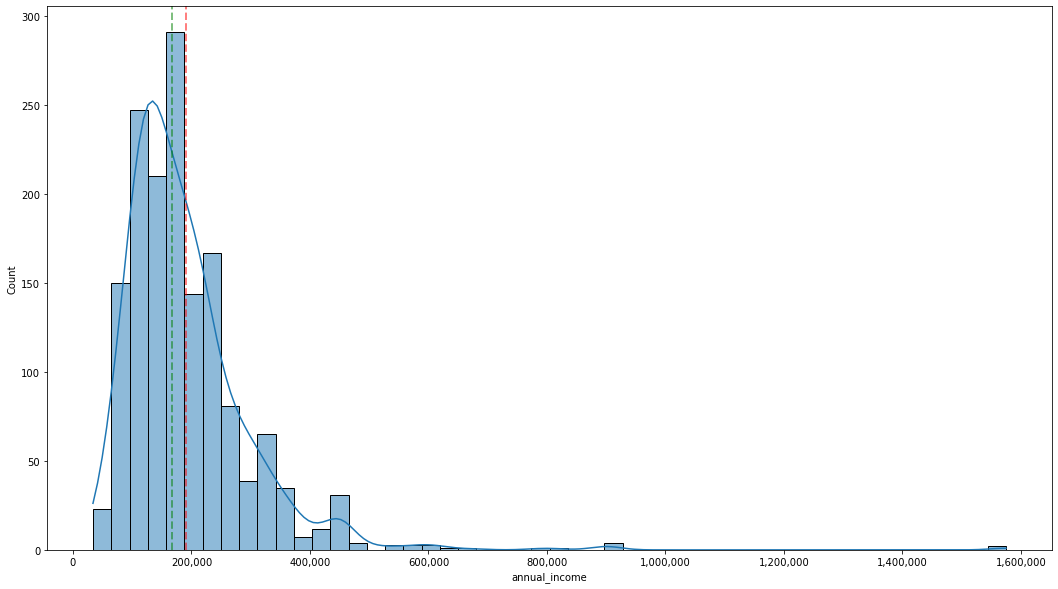

In [93]:
#Distribution plot
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(x='annual_income', bins=50, kde=True, data=data)
plt.axvline(x=data['annual_income'].mean(), color='red', linestyle='dashed', linewidth=2, alpha=0.5)
plt.axvline(x=data['annual_income'].median(), color='green', linestyle='dashed', linewidth=2, alpha=0.5)
    
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

**Observation:**
- Mean is slightelly higher then median
- There is a applicant who makes more then 1000000
- the feature is right or positively skewed

**2.3.5 type_income**

In [95]:
data['type_income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: type_income, dtype: int64

<AxesSubplot:xlabel='type_income', ylabel='count'>

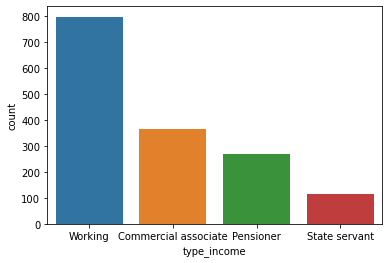

In [96]:
#Bar plot
sns.countplot(x='type_income', data=data, order=data['type_income'].value_counts().index)


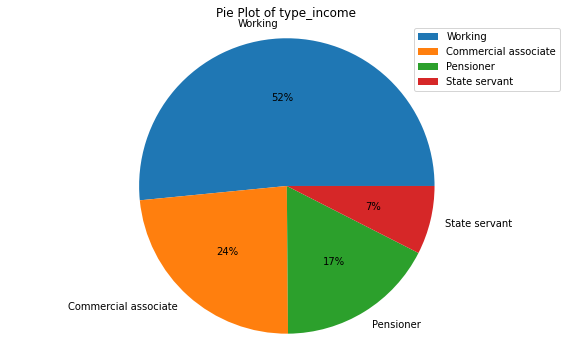

In [97]:
#Pie plot
grouped_data = pd.DataFrame(data['type_income'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.type_income, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of type_income')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most of the applicant are woking, only 17% of them are pensioner

**2.3.6 education**

In [98]:
data['education'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: education, dtype: int64

[Text(0, 0, 'Secondary / secondary special'),
 Text(1, 0, 'Higher education'),
 Text(2, 0, 'Incomplete higher'),
 Text(3, 0, 'Lower secondary'),
 Text(4, 0, 'Academic degree')]

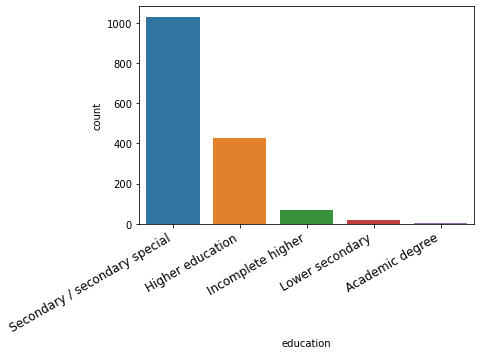

In [104]:
fig= sns.countplot(x='education', data=data, order=data['education'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)

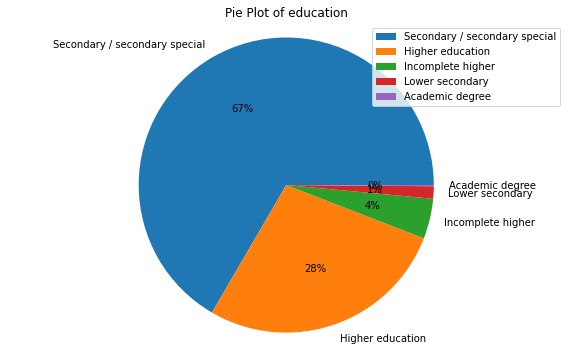

In [105]:
#Pie plot
grouped_data = pd.DataFrame(data['education'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.education, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of education')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most of the applicant have completed their secondary degree and approx 28% of applicant have completed higher education

**2.3.8 marital_status**

In [106]:
data['marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: marital_status, dtype: int64

[Text(0, 0, 'Married'),
 Text(1, 0, 'Single / not married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Separated'),
 Text(4, 0, 'Widow')]

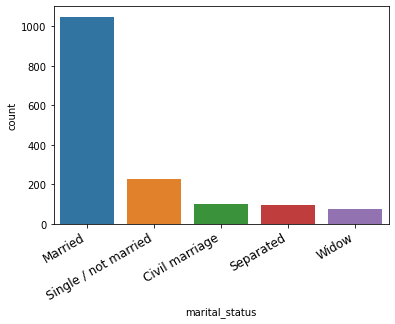

In [108]:
fig=sns.countplot(x='marital_status', data=data, order=data['marital_status'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)

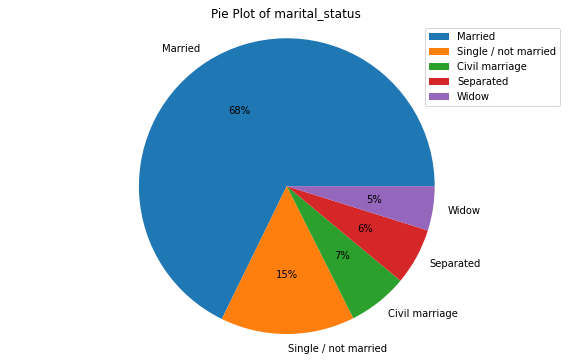

In [109]:
#Pie plot
grouped_data = pd.DataFrame(data['marital_status'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.marital_status, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of marital_status')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most applicant are married
- 

**2.3.9 housing_type**

In [110]:
data['housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: housing_type, dtype: int64

In [ ]:
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)

[Text(0, 0, 'House / apartment'),
 Text(1, 0, 'With parents'),
 Text(2, 0, 'Municipal apartment'),
 Text(3, 0, 'Rented apartment'),
 Text(4, 0, 'Office apartment'),
 Text(5, 0, 'Co-op apartment')]

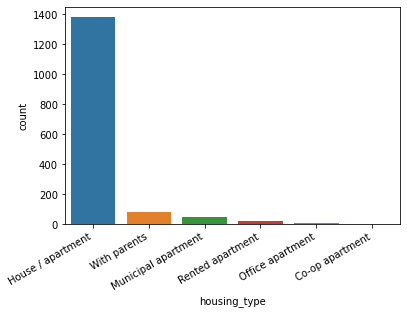

In [112]:
fig = sns.countplot(x='housing_type', data=data, order=data['housing_type'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=10)

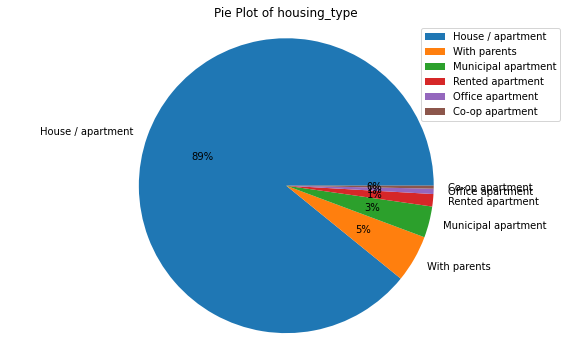

In [115]:
#Pie plot
grouped_data = pd.DataFrame(data['housing_type'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.housing_type, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of housing_type')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Almost every applicant have appartment

**2.3.10 birthday_count**

In [116]:
data['birthday_count'].value_counts()

-21363.0    5
-22655.0    5
-14523.0    5
-13557.0    5
-17915.0    4
           ..
-13200.0    1
-15423.0    1
-11061.0    1
-10261.0    1
-18095.0    1
Name: birthday_count, Length: 1270, dtype: int64

In [118]:
#For better understandig convert them into age
round(abs(data['birthday_count']/365.25),1).value_counts()

57.1    13
42.3    11
37.1    11
32.1    11
47.8    11
        ..
41.3     1
29.1     1
61.9     1
35.3     1
66.8     1
Name: birthday_count, Length: 418, dtype: int64

<AxesSubplot:ylabel='birthday_count'>

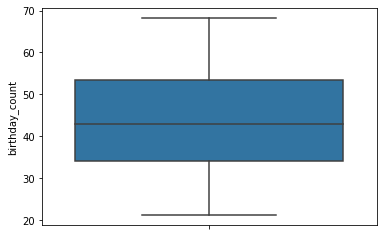

In [126]:
sns.boxplot(y=np.abs(data['birthday_count']/365.25))

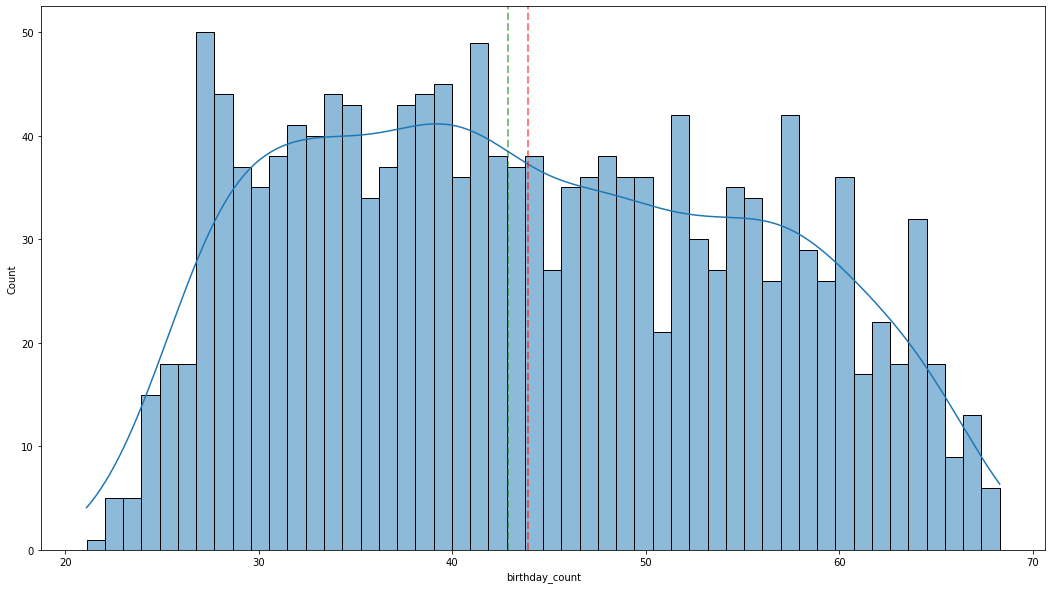

In [124]:
#Distribution plot
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(np.abs(data['birthday_count']/365.25), bins=50, kde=True)
plt.axvline(x=round(abs(data['birthday_count']/365.25),1).mean(), color='red', linestyle='dashed', linewidth=2, alpha=0.5)
plt.axvline(x=round(abs(data['birthday_count']/365.25),1).median(), color='green', linestyle='dashed', linewidth=2, alpha=0.5)
    
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [128]:
mean = round(abs(data['birthday_count']/365.25),1).mean()
median = round(abs(data['birthday_count']/365.25),1).median()
print(f"Mean: {mean}\n")
print(f"Median: {median}")

Mean: 43.916775884665725

Median: 42.9


**Observation:**
- The youngest applicant is 21 years old while the oldest is 68 years old. with the average of 43.9 and median of 42.9(outliers insensitive)
- Age feature is not normally distributed, it is slightly positively skew

**2.3.11 employed_days**

In [149]:
round(abs(data['employed_days']/365.25),1).describe()

count    1548.000000
mean      174.674160
std       371.837348
min         0.200000
25%         3.200000
50%         6.800000
75%        16.525000
max      1000.000000
Name: employed_days, dtype: float64

In [129]:
data['employed_days'].value_counts()

 365243    261
-586         6
-1649        5
-3420        5
-460         5
          ... 
-734         1
-735         1
-2788        1
-1224        1
-4082        1
Name: employed_days, Length: 956, dtype: int64

In [143]:
#For better understandig convert them into age
round(abs(data['employed_days']/365.25),1).value_counts()

1000.0    261
1.4        21
0.6        21
0.4        21
2.5        21
         ... 
16.5        1
40.8        1
31.6        1
25.3        1
15.2        1
Name: employed_days, Length: 230, dtype: int64

<AxesSubplot:ylabel='employed_days'>

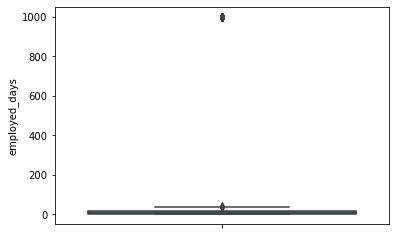

In [146]:
sns.boxplot(y=round(abs(data['employed_days']/365.25),1))

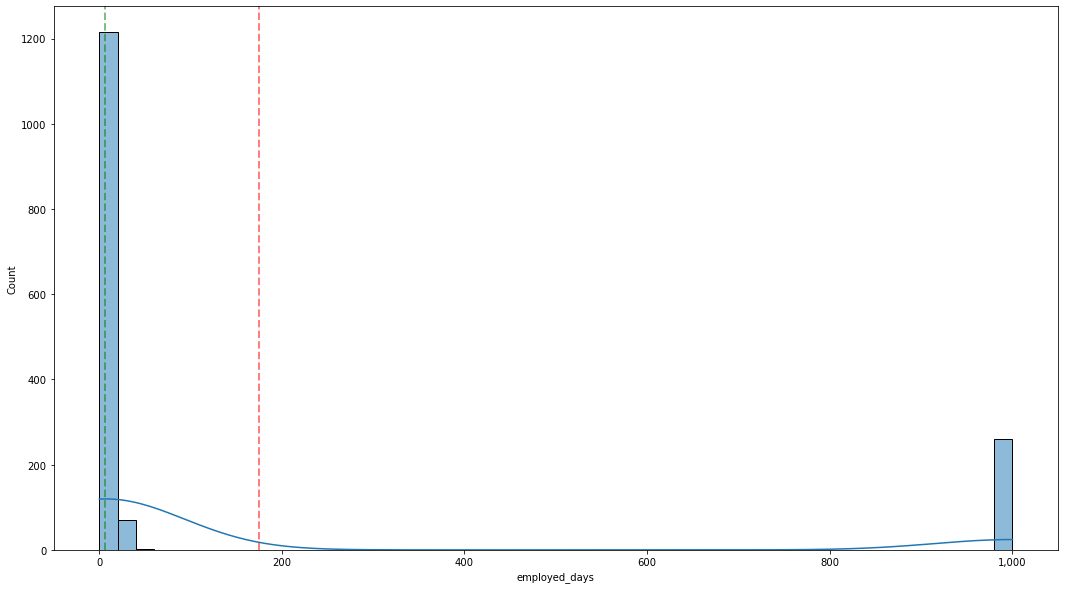

In [147]:
#Distribution plot
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(np.abs(data['employed_days']/365.25), bins=50, kde=True)
plt.axvline(x=round(abs(data['employed_days']/365.25),1).mean(), color='red', linestyle='dashed', linewidth=2, alpha=0.5)
plt.axvline(x=round(abs(data['employed_days']/365.25),1).median(), color='green', linestyle='dashed', linewidth=2, alpha=0.5)
    
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

**Observation:**
- There are 261 indivisuals having **1000 years** of work experiance, which is practically not possible.

**2.3.12 Having mobile_phone**

In [150]:
data['mobile_phone'].value_counts()

1    1548
Name: mobile_phone, dtype: int64

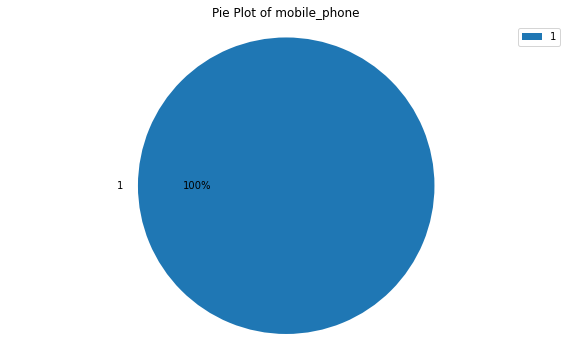

In [151]:
#Pie plot
grouped_data = pd.DataFrame(data['mobile_phone'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.mobile_phone, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of mobile_phone')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- All the applicant have mobile phone

**2.3.13 work_phone**

In [152]:
data['work_phone'].value_counts()

0    1226
1     322
Name: work_phone, dtype: int64

<AxesSubplot:xlabel='work_phone', ylabel='count'>

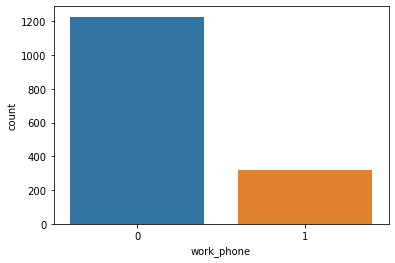

In [153]:
sns.countplot(x='work_phone', data=data)

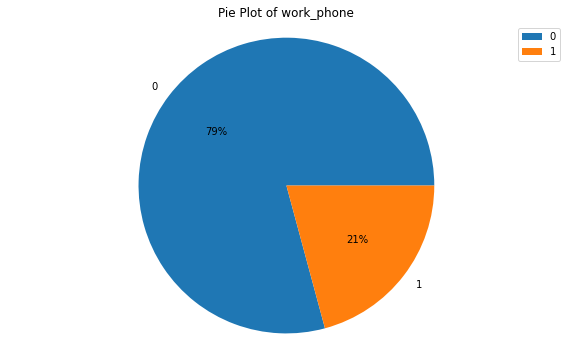

In [154]:
#Pie plot
grouped_data = pd.DataFrame(data['work_phone'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.work_phone, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of work_phone')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most of the applicant have not work phone
- 0 mean not work phone and 1 means having work phone

**2.3.14 phone**

In [155]:
data['phone'].value_counts()

0    1069
1     479
Name: phone, dtype: int64

<AxesSubplot:xlabel='phone', ylabel='count'>

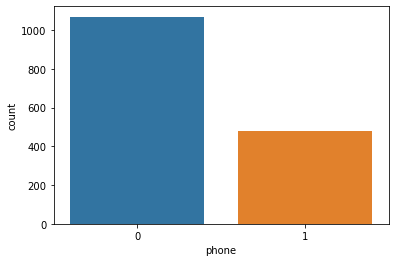

In [156]:
sns.countplot(x='phone', data=data)

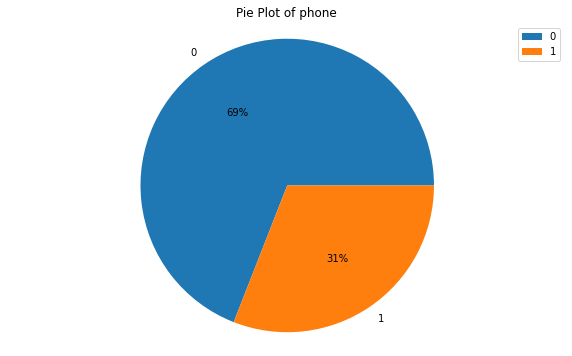

In [157]:
#Pie plot
grouped_data = pd.DataFrame(data['phone'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.phone, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of phone')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- More then 30% applicant don't have phone (here phone means may be work phone, because all applicant have mobile phone)
- here 0 means no and 1 means yes

**2.3.15 email_id**

In [158]:
data['email_id'].value_counts()

0    1405
1     143
Name: email_id, dtype: int64

<AxesSubplot:xlabel='email_id', ylabel='count'>

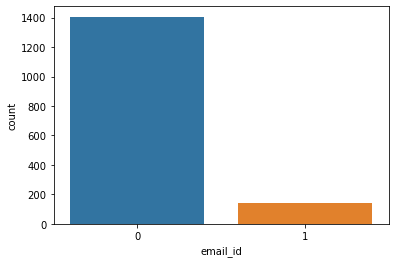

In [159]:
sns.countplot(x='email_id', data=data)

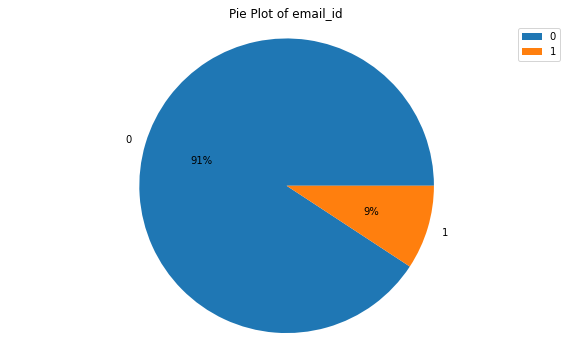

In [160]:
#Pie plot
grouped_data = pd.DataFrame(data['email_id'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.email_id, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of email_id')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most of the applicant have not email id

**2.3.16 type_occupation**

In [162]:
data['type_occupation'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: type_occupation, dtype: int64

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Managers'),
 Text(3, 0, 'Sales staff'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'High skill tech staff'),
 Text(6, 0, 'Medicine staff'),
 Text(7, 0, 'Accountants'),
 Text(8, 0, 'Security staff'),
 Text(9, 0, 'Cleaning staff'),
 Text(10, 0, 'Cooking staff'),
 Text(11, 0, 'Private service staff'),
 Text(12, 0, 'Low-skill Laborers'),
 Text(13, 0, 'Secretaries'),
 Text(14, 0, 'Waiters/barmen staff'),
 Text(15, 0, 'HR staff'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'Realty agents')]

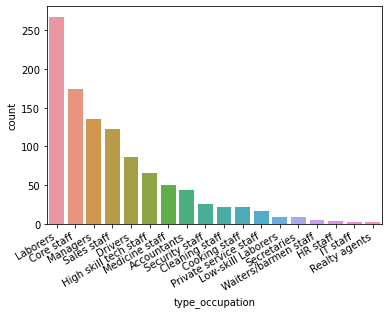

In [167]:
fig = sns.countplot(x='type_occupation', data=data, order=data['type_occupation'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=10)

**2.3.17 family_members**

In [168]:
data['family_members'].value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: family_members, dtype: int64

<AxesSubplot:xlabel='family_members', ylabel='count'>

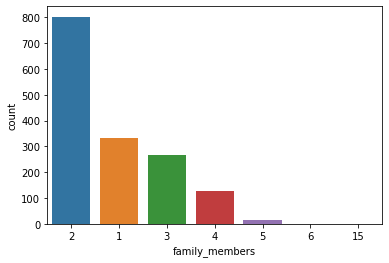

In [170]:
sns.countplot(x='family_members', data=data, order=data['family_members'].value_counts().index)

<AxesSubplot:ylabel='family_members'>

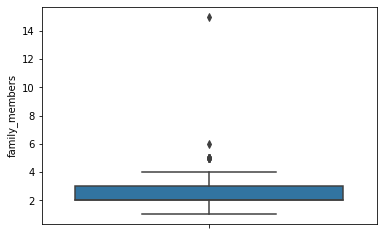

In [171]:
sns.boxplot(y='family_members', data=data)

**Observation:**
- As previously discussed most applicant don’t have a child
- Also here we have 3 outliers, probably the same from the children count

**2.3.18 Target Variable (label)**

In [172]:
df_target

ind_id  label
0     5008827      1
1     5009744      1
2     5009746      1
3     5009749      1
4     5009752      1
...       ...    ...
1543  5028645      0
1544  5023655      0
1545  5115992      0
1546  5118219      0
1547  5053790      0

[1548 rows x 2 columns]

In [174]:
df_target['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

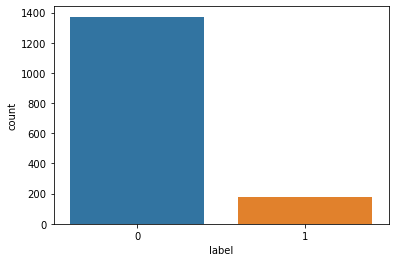

In [176]:
sns.countplot(x='label', data=df_target)

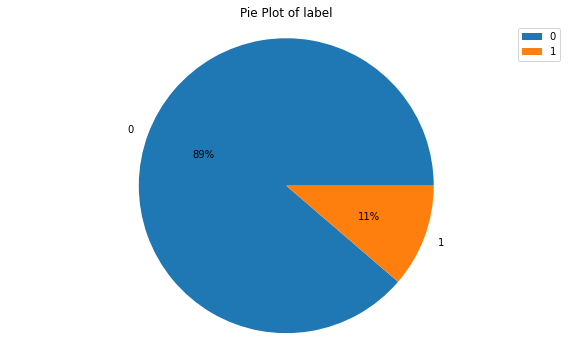

In [178]:
#Pie plot
grouped_data = pd.DataFrame(df_target['label'].value_counts())
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(grouped_data.label, labels=grouped_data.index, autopct='%.0f%%')
plt.title('Pie Plot of label')
ax.axis('equal')
plt.legend()
plt.show()

**Observation:**
- Most of the applicant get approval for credit card
- since, most of the data belongs to 0, so that the target variable data is very imbalance

Note: 0 means Credit Card Approvaed and 1 means Rejected

### 2.4 Bivariate Analysis

**2.4.1 Numerical vs Numerical Features**
- We will find correlation using Scatter Plot

**2.4.1.1 Scatter Plots**

In [184]:
data.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members'],
      dtype='object')

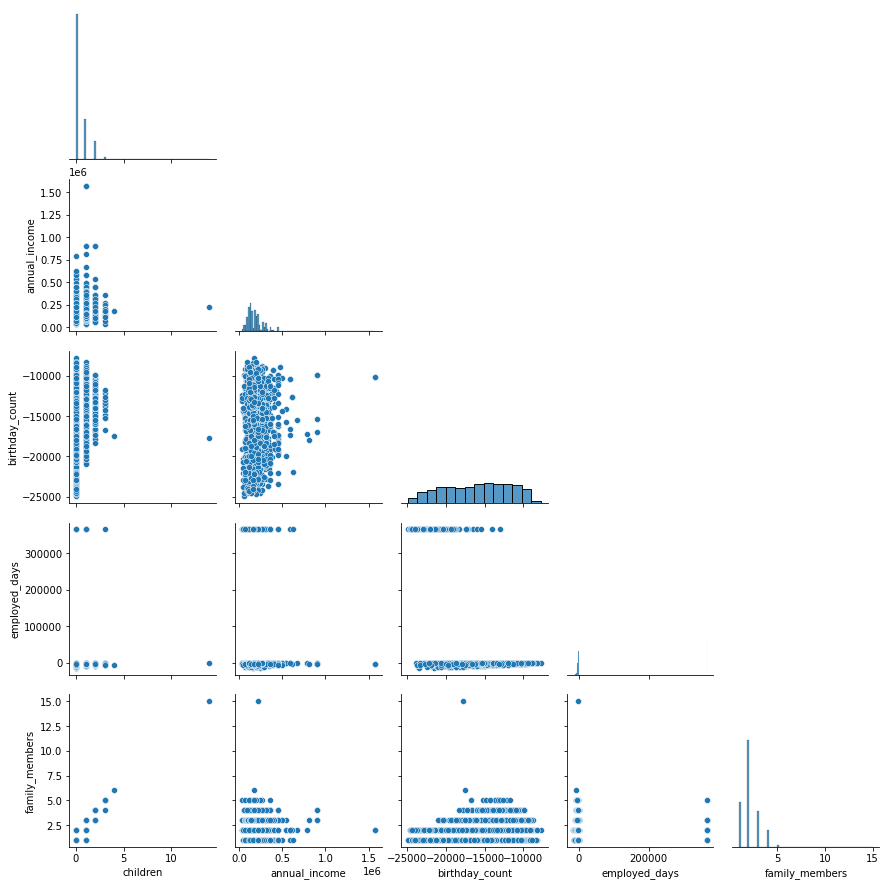

In [186]:
#selecting numerical featuresthen droping some features which are not required
sns.pairplot(data.select_dtypes(include=['int64', 'float64']).drop(['ind_id', 'mobile_phone','work_phone', 'phone', 
                                                                    'email_id'], axis=1), corner=True)

**Observation:**
- We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.

**2.4.1.1.1 Family member count vs children count**

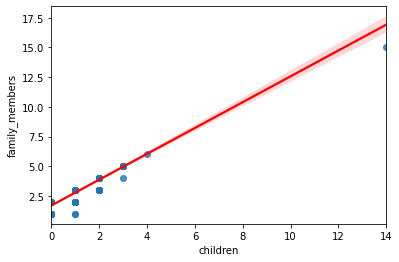

In [187]:
sns.regplot(x='children',y='family_members',data=data,line_kws={'color': 'red'})
plt.show()

**Observation:**
- The more children a indivusal has, the larger the family member count.

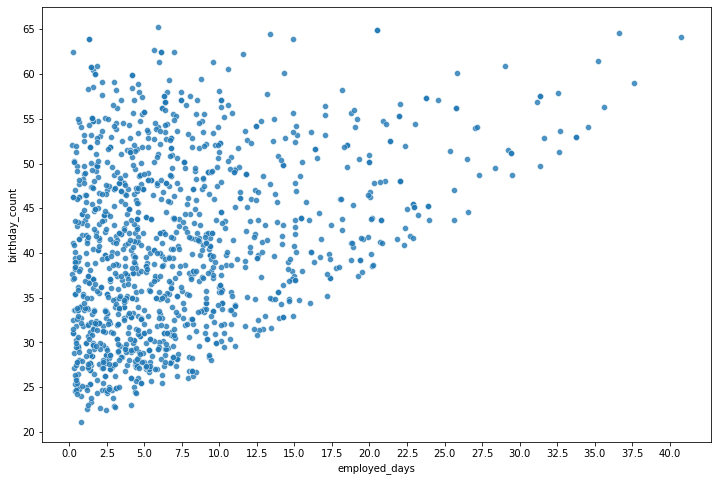

In [191]:
x_employ_days = np.abs(data[data['employed_days'] < 0]['employed_days'])/365.25
y_age = np.abs(data[data['birthday_count'] < 0]['birthday_count'])/365.25
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x_employ_days,y_age,alpha=.8)
# change the frequency of the x-axis and y-axis labels
plt.xticks(np.arange(0, x_employ_days.max(), 2.5))
plt.yticks(np.arange(20, y_age.max(), 5))
plt.show()

**Observation:**
- This scatterplot shows that the birthday_count(age) of the applicants is correlated with the employed_days(Work Experiance).
- The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the work experiance. You can't have an work experiance greater then age.

In [ ]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
cc_train_copy_corr_no_mobile = pd.concat([cc_train_copy.drop(['Has a mobile phone','Is high risk'], axis=1),is_high_risk_int],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(cc_train_copy_corr_no_mobile, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(cc_train_copy_corr_no_mobile, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

In [56]:
data.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members'],
      dtype='object')